# LightGBM

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report,f1_score

In [2]:
import warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]


In [5]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

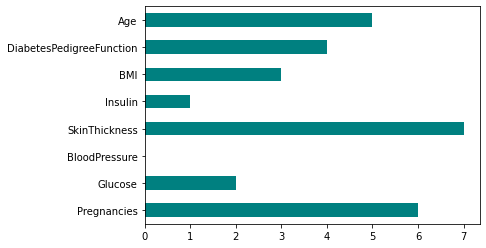

SkinThickness               7
Pregnancies                 6
Age                         5
DiabetesPedigreeFunction    4
BMI                         3
Glucose                     2
Insulin                     1
BloodPressure               0
dtype: int32


In [6]:
from  skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as pyp
%matplotlib inline

ranks = fisher_score.fisher_score(X.values,y.values)

feature_importances = pd.Series(ranks,index = X.columns)
feature_importances.plot(kind = 'barh', color = 'teal')
pyp.show()

sort = feature_importances.sort_values(ascending = False)
print(sort)

In [22]:
selected_features = sort.index.tolist()
X_reordered = X[selected_features]

X_train,X_test,y_train,y_test = train_test_split(X_reordered,y,test_size = 0.2,random_state=0)

import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf_params = {"learning_rate": [0.01, 0.03, 0.05, 0.1, 0.5],
              "n_estimators": [500, 1000, 1500],
              "max_depth":[3,5,8]}
gs_cv = GridSearchCV(clf,clf_params,cv = 10,n_jobs = -1,verbose = 2).fit(X, y)

gs_cv.fit(X_train, y_train)

# Use the best estimator from grid search to make predictions
best_clf = gs_cv.best_estimator_
y_pred = best_clf.predict(X_test)

Fitting 10 folds for each of 45 candidates, totalling 450 fits
[LightGBM] [Info] Number of positive: 268, number of negative: 500
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 764
[LightGBM] [Info] Number of data points in the train set: 768, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348958 -> initscore=-0.623621
[LightGBM] [Info] Start training from score -0.623621
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [23]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [24]:
classi = classification_report(y_test,y_pred)
print(classi)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       107
           1       0.68      0.68      0.68        47

    accuracy                           0.81       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.81      0.81      0.81       154



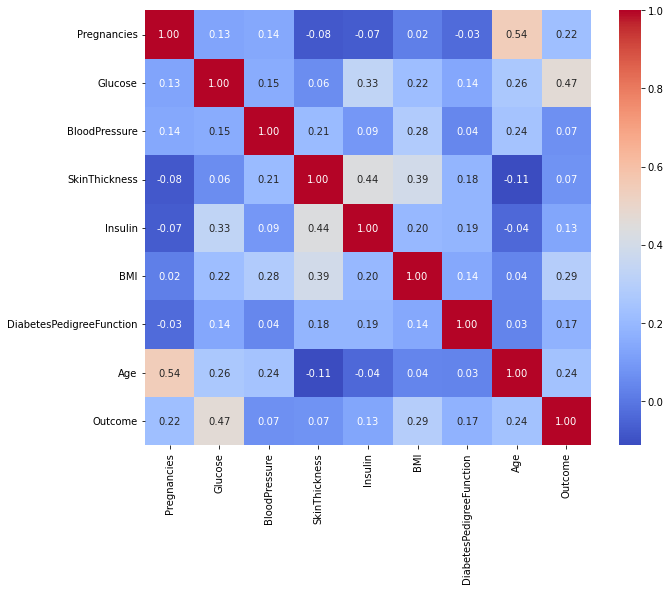

In [25]:
corr = df.corr()

pyp.figure(figsize = (10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
pyp.show()

In [11]:
!python --version

Python 3.9.12


C:\Users\91905\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Outcome', ylabel='Density'>

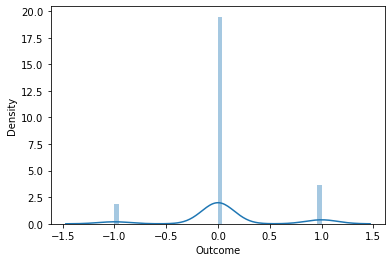

In [21]:
import seaborn as sns
sns.distplot(y_test-y_pred,bins=50)

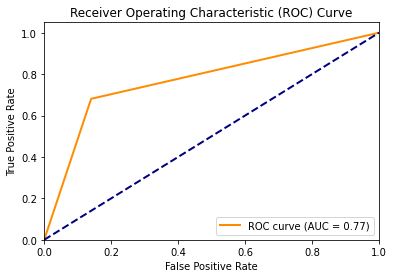

In [29]:
from sklearn.metrics import roc_curve,auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
pyp.figure()
pyp.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
pyp.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
pyp.xlim([0.0, 1.0])
pyp.ylim([0.0, 1.05])
pyp.xlabel('False Positive Rate')
pyp.ylabel('True Positive Rate')
pyp.title('Receiver Operating Characteristic (ROC) Curve')
pyp.legend(loc="lower right")
pyp.show()


In [ ]:
#Implementation of Naive Bayes Approach

# Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model = GaussianNB()
model.fit(X_train, y_train)

y_pred1 = model.predict(X_test)
print(y_pred)


[1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


In [35]:
accuracy = accuracy_score(y_test, y_pred1)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.79


In [36]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154



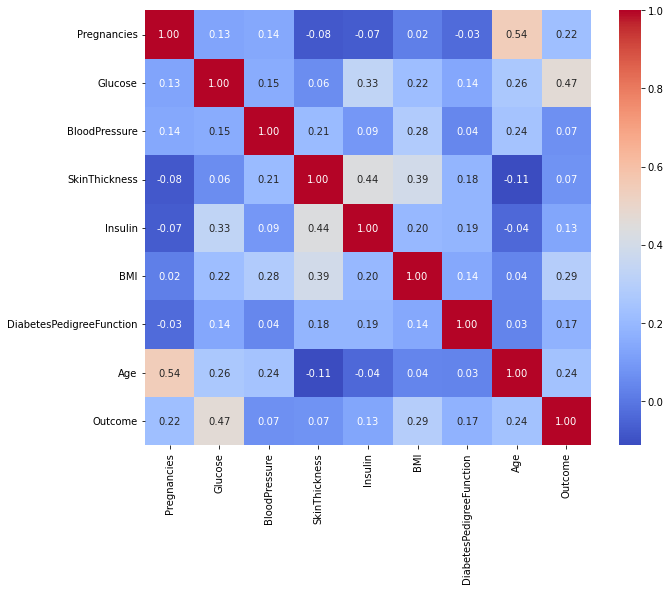

In [37]:
corr = df.corr()

pyp.figure(figsize = (10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
pyp.show()

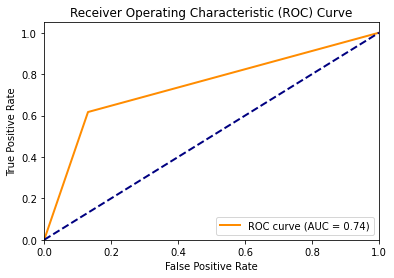

In [38]:
from sklearn.metrics import roc_curve,auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
pyp.figure()
pyp.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
pyp.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
pyp.xlim([0.0, 1.0])
pyp.ylim([0.0, 1.05])
pyp.xlabel('False Positive Rate')
pyp.ylabel('True Positive Rate')
pyp.title('Receiver Operating Characteristic (ROC) Curve')
pyp.legend(loc="lower right")
pyp.show()


# Interface

In [2]:
ds = pd.read_csv('diabetes.csv')
ds.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Assuming your data is in a DataFrame named 'ds'
# X should contain the feature columns, and y should contain the target column
X = ds.drop('Outcome', axis=1)
y = ds['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create widgets for input values
pregnancies_input = widgets.FloatText(description='Pregnancies:')
glucose_input = widgets.FloatText(description='Glucose:')
blood_pressure_input = widgets.FloatText(description='Blood Pressure:')
skin_thickness_input = widgets.FloatText(description='Skin Thickness:')
insulin_input = widgets.FloatText(description='Insulin:')
bmi_input = widgets.FloatText(description='BMI:')
diabetes_pedigree_input = widgets.FloatText(description='Diabetes Pedigree:')
age_input = widgets.FloatText(description='Age:')

# Create a dropdown widget for selecting the model
model_dropdown = widgets.Dropdown(
    options=['GaussianNB', 'LGBMClassifier'],
    value='GaussianNB',
    description='Select Model:'
)

# Create a button for making predictions
predict_button = widgets.Button(description='Predict')

# Create an output widget for displaying predictions
prediction_result = widgets.Output()

# Define function to handle button click event
def on_predict_button_click(button):
    clear_output(wait=True)
    model_name = model_dropdown.value
    
    if model_name == 'GaussianNB':
        model = GaussianNB()
    elif model_name == 'LGBMClassifier':
        model = LGBMClassifier()
    else:
        raise ValueError(f"Invalid model selected: {model_name}")
    
    try:
        # Convert widget values to numeric
        input_values = [
            float(pregnancies_input.value), float(glucose_input.value),
            float(blood_pressure_input.value), float(skin_thickness_input.value),
            float(insulin_input.value), float(bmi_input.value),
            float(diabetes_pedigree_input.value), float(age_input.value)
        ]
        
        # Add print statements for debugging
        print("Training data shape:", X_train.shape, y_train.shape)
        model.fit(X_train, y_train)
        print("Model trained successfully.")
        input_data = pd.DataFrame([input_values], columns=X.columns)
        prediction = model.predict(input_data)
        print(f"The predicted outcome is: {prediction[0]}")

    except Exception as e:
        print("Error during training or prediction:", e)

# Attach the button click event
predict_button.on_click(on_predict_button_click)

# Display the widgets
display(pregnancies_input, glucose_input, blood_pressure_input, skin_thickness_input,
        insulin_input, bmi_input, diabetes_pedigree_input, age_input, model_dropdown,
        predict_button, prediction_result)


FloatText(value=0.0, description='Pregnancies:')

FloatText(value=0.0, description='Glucose:')

FloatText(value=0.0, description='Blood Pressure:')

FloatText(value=0.0, description='Skin Thickness:')

FloatText(value=0.0, description='Insulin:')

FloatText(value=0.0, description='BMI:')

FloatText(value=0.0, description='Diabetes Pedigree:')

FloatText(value=0.0, description='Age:')

Dropdown(description='Select Model:', options=('GaussianNB', 'LGBMClassifier'), value='GaussianNB')

Button(description='Predict', style=ButtonStyle())

Output()

In [11]:
ds

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
